rectangles_BRAIIM.txt stats:
Fifth percentile area: 7712.2
95th percentile area, max: 41703.89999999997, 97980
Square deviation 90th, 95th percentile: 0.5797714716223004, 0.7472527472527473


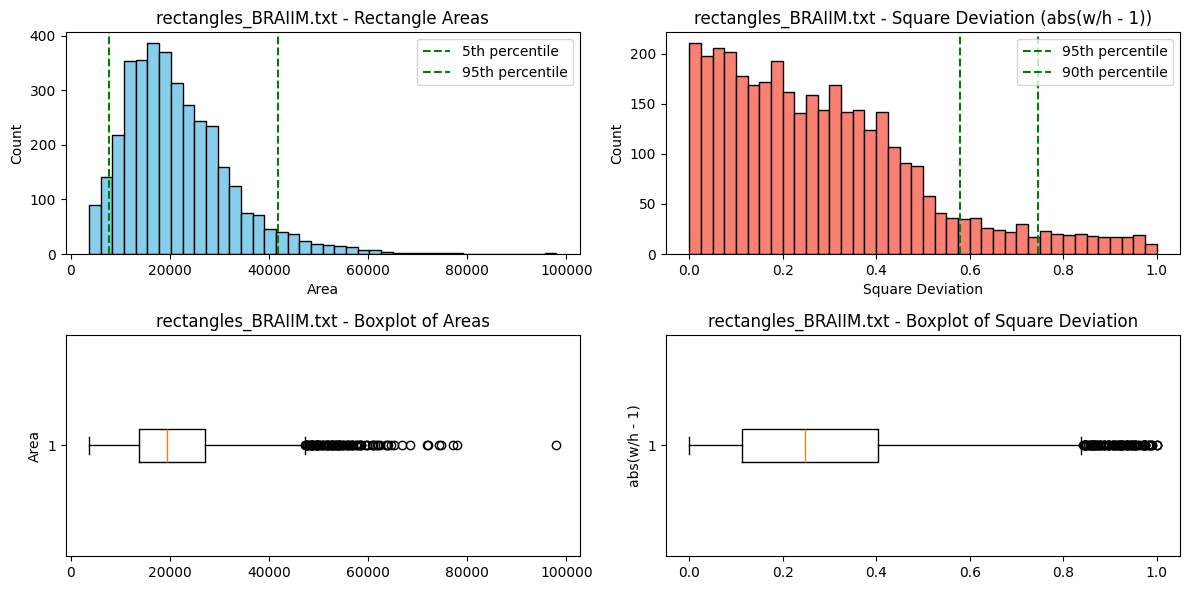

rectangles_LIRIBO.txt stats:
Fifth percentile area: 5545.2
95th percentile area, max: 22339.799999999996, 28525
Square deviation 90th, 95th percentile: 0.6263736263736264, 0.758041958041958


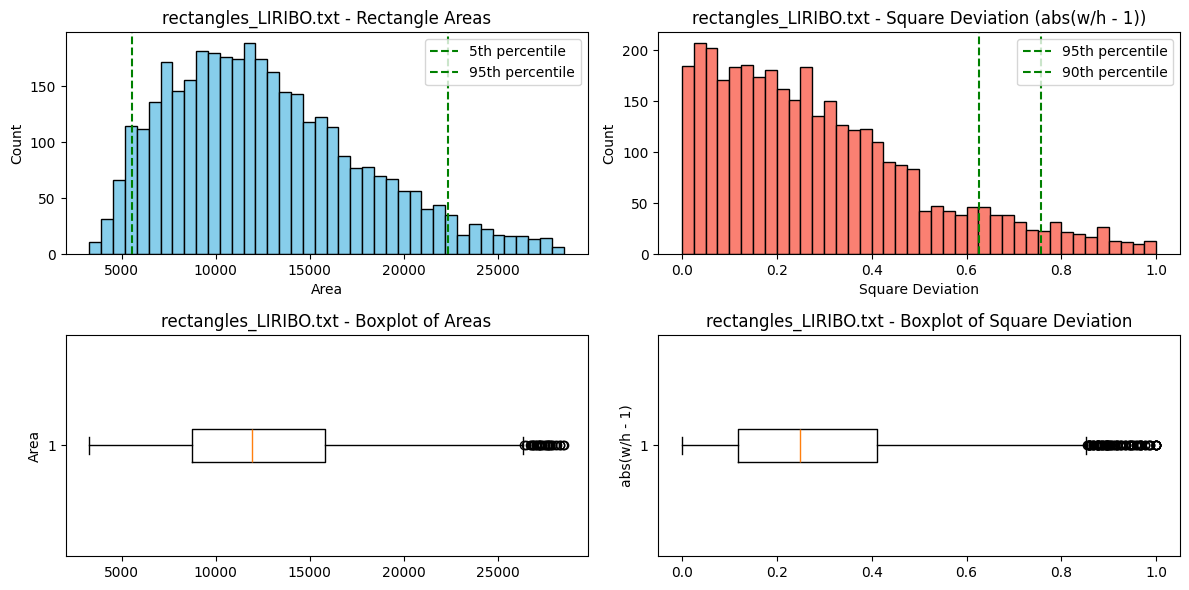

rectangles_TRIAVA.txt stats:
Fifth percentile area: 525.0
95th percentile area, max: 3168.199999999999, 7830
Square deviation 90th, 95th percentile: 0.7272727272727273, 0.875


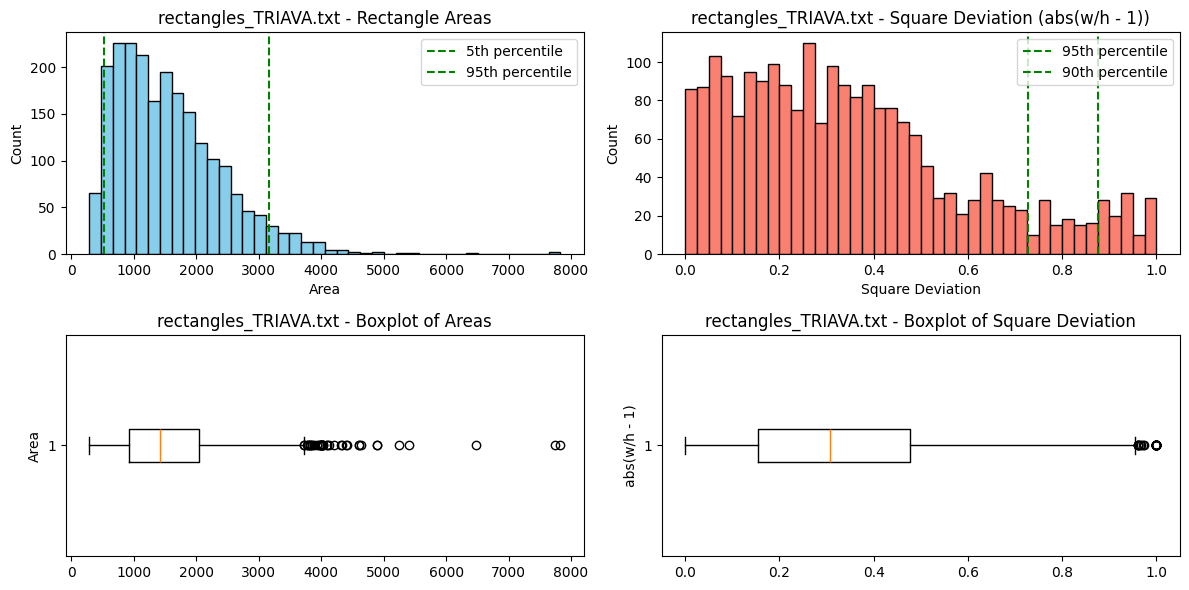

In [ ]:
import os
import ast
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Load rectangle files ---
rect_folder = "/user/christoph.wald/u15287/insect_pest_detection/image_processing_in_progress/"
rect_files = sorted([f for f in os.listdir(rect_folder) if f.endswith(".txt")])

for file_name in rect_files:
    areas = []
    square_devs = []

    with open(os.path.join(rect_folder, file_name), "r") as f:
        for line in f:
            line = line.strip()
            if line:  # skip empty lines
                rects = ast.literal_eval(line)
                for x, y, w, h in rects:
                    areas.append(w * h)
                    square_devs.append(abs(w / h - 1))  # deviation from square

    areas = np.array(areas)
    square_devs = np.array(square_devs)

    # --- Step 2: Compute percentiles ---
    print(f"{file_name} stats:")
    print(f"95th percentile area, max: {np.percentile(areas,95)}, {np.max(areas)}")

    print(f"Square deviation 90th, 95th percentile: { np.percentile(square_devs, 90)}, { np.percentile(square_devs, 95)}")

    # --- Step 3: Plot distributions ---
    plt.figure(figsize=(12, 6))
    
    # Histogram for areas
    plt.subplot(2, 2, 1)
    plt.hist(areas, bins=40, color='skyblue', edgecolor='black')
    plt.axvline(np.percentile(areas, 95), color='green', linestyle='--', label='95th percentile')
    plt.title(f"{file_name} - Rectangle Areas")
    plt.xlabel("Area")
    plt.ylabel("Count")
    plt.legend()
    
    # Histogram for square deviation with percentile lines
    plt.subplot(2, 2, 2)
    plt.hist(square_devs, bins=40, color='salmon', edgecolor='black')
    plt.axvline(np.percentile(square_devs, 95), color='green', linestyle='--', label='95th percentile')
    plt.axvline(np.percentile(square_devs, 90), color='green', linestyle='--', label='90th percentile')
    plt.title(f"{file_name} - Square Deviation (abs(w/h - 1))")
    plt.xlabel("Square Deviation")
    plt.ylabel("Count")
    plt.legend()
    
    # Boxplot for areas
    plt.subplot(2, 2, 3)
    plt.boxplot(areas, vert = False)
    plt.title(f"{file_name} - Boxplot of Areas")
    plt.ylabel("Area")
    
    # Boxplot for square deviation
    plt.subplot(2, 2, 4)
    plt.boxplot(square_devs, vert= False)
    plt.title(f"{file_name} - Boxplot of Square Deviation")
    plt.ylabel("abs(w/h - 1)")
    
    plt.tight_layout()
    plt.show()


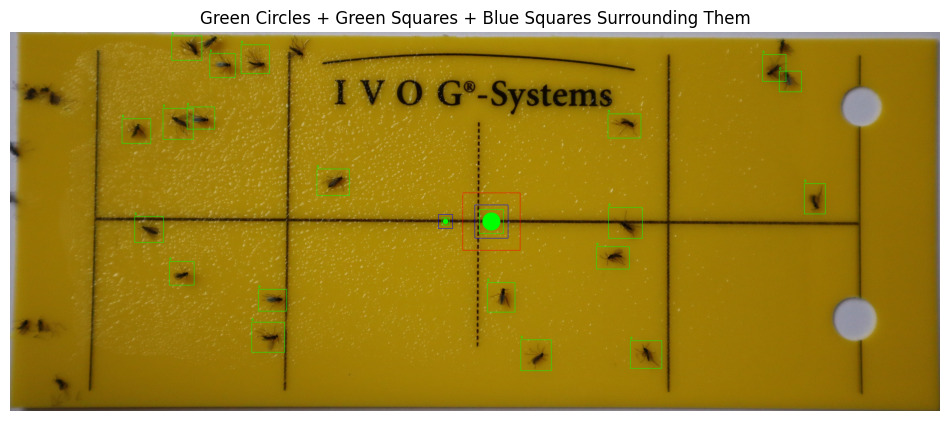

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from modules_segmentation import scale_rect

# --- Load background image ---
image = cv2.imread("//user/christoph.wald/u15287/big-scratch/01_dataset/images_w_bboxes/FungusGnats/BRAIIM_0001_with_boxes.jpg")
image_height, image_width = image.shape[:2]

# --- Example areas ---
areas = [1000, 10000, 7800, 43200, 127794]

# --- Initialize lists ---
rectangles = []  # squares for circles
rects_scaled = []  # squares around circles (scaled 1.5)

# --- Layout parameters ---
center_y = image_height // 2
x_cursor = image_width// 2 - 200  # start with a margin

# --- Draw shapes on a copy of the image ---
img_copy = image.copy()

green_graphics_bbox = []  # to store bounding box of first two graphics

# 1. First two green circles + green squares (scaled)
for i, area in enumerate(areas[:2]):
    side = int(math.sqrt(area))
    radius = int(math.sqrt(area/np.pi))
    
    # Position: top-left corner of circle
    circle_center = (x_cursor + radius, center_y)
    
    # Draw green circle
    cv2.circle(img_copy, circle_center, radius, (0,255,0), -1)
    
    # Draw green square around circle (scaled by 1.5)
    scaled_side = int(side * 1.5)
    top_left_square = (circle_center[0] - scaled_side//2, circle_center[1] - scaled_side//2)
    bottom_right_square = (top_left_square[0] + scaled_side, top_left_square[1] + scaled_side)
    cv2.rectangle(img_copy, top_left_square, bottom_right_square, (0,255,0), 2)

    #Draw blue square around circle (5th percentile)
    side = int(math.sqrt(areas[i+2]))
    top_left_square = (circle_center[0] - side//2, circle_center[1]- side//2)
    bottom_right_square = (top_left_square[0] + side, top_left_square[1] + side)
    cv2.rectangle(img_copy, top_left_square, bottom_right_square, (255,0,0), 2)
    
    if i == 1:
        #Draw blue square around circle (5th percentile)
        side = int(math.sqrt(areas[i+3]))
        top_left_square = (circle_center[0] - side//2, circle_center[1]- side//2)
        bottom_right_square = (top_left_square[0] + side, top_left_square[1] + side)
        cv2.rectangle(img_copy, top_left_square, bottom_right_square, (0,0,255), 2)
    
    
    x_cursor += scaled_side + spacing  # move cursor for next graphic



# --- Display in Jupyter ---
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Green Circles + Green Squares + Blue Squares Surrounding Them")
plt.show()


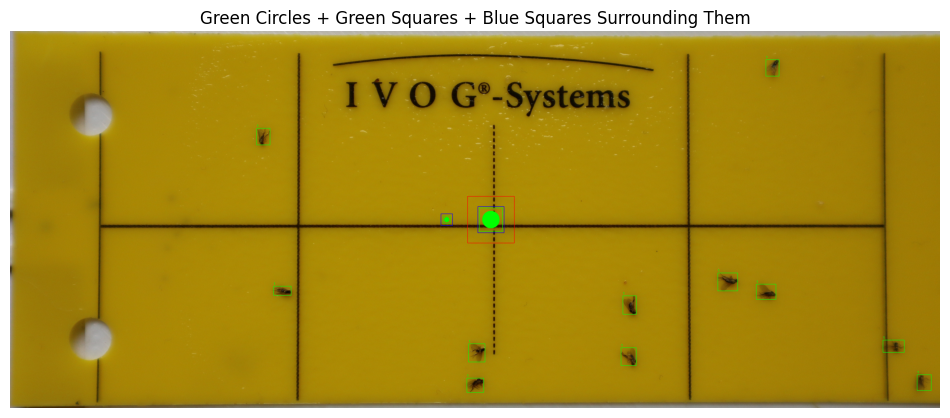

In [26]:
# --- Load background image ---
image = cv2.imread("/user/christoph.wald/u15287/big-scratch/01_dataset/images_w_bboxes/LeafMinerFlies/LIRIBO_0007_with_boxes.jpg")
image_height, image_width = image.shape[:2]

# --- Example areas ---
areas = [1000, 10000, 5688, 28626, 90895]

# --- Initialize lists ---
rectangles = []  # squares for circles
rects_scaled = []  # squares around circles (scaled 1.5)

# --- Layout parameters ---
center_y = image_height // 2
x_cursor = image_width// 2 - 200  # start with a margin

# --- Draw shapes on a copy of the image ---
img_copy = image.copy()

green_graphics_bbox = []  # to store bounding box of first two graphics

# 1. First two green circles + green squares (scaled)
for i, area in enumerate(areas[:2]):
    side = int(math.sqrt(area))
    radius = int(math.sqrt(area/np.pi))
    
    # Position: top-left corner of circle
    circle_center = (x_cursor + radius, center_y)
    
    # Draw green circle
    cv2.circle(img_copy, circle_center, radius, (0,255,0), -1)
    
    # Draw green square around circle (scaled by 1.5)
    scaled_side = int(side * 1.5)
    top_left_square = (circle_center[0] - scaled_side//2, circle_center[1] - scaled_side//2)
    bottom_right_square = (top_left_square[0] + scaled_side, top_left_square[1] + scaled_side)
    cv2.rectangle(img_copy, top_left_square, bottom_right_square, (0,255,0), 2)

    #Draw blue square around circle (5th percentile)
    side = int(math.sqrt(areas[i+2]))
    top_left_square = (circle_center[0] - side//2, circle_center[1]- side//2)
    bottom_right_square = (top_left_square[0] + side, top_left_square[1] + side)
    cv2.rectangle(img_copy, top_left_square, bottom_right_square, (255,0,0), 2)
    
    if i == 1:
        #Draw blue square around circle (5th percentile)
        side = int(math.sqrt(areas[i+3]))
        top_left_square = (circle_center[0] - side//2, circle_center[1]- side//2)
        bottom_right_square = (top_left_square[0] + side, top_left_square[1] + side)
        cv2.rectangle(img_copy, top_left_square, bottom_right_square, (0,0,255), 2)
    
    
    x_cursor += scaled_side + spacing  # move cursor for next graphic



# --- Display in Jupyter ---
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Green Circles + Green Squares + Blue Squares Surrounding Them")
plt.show()


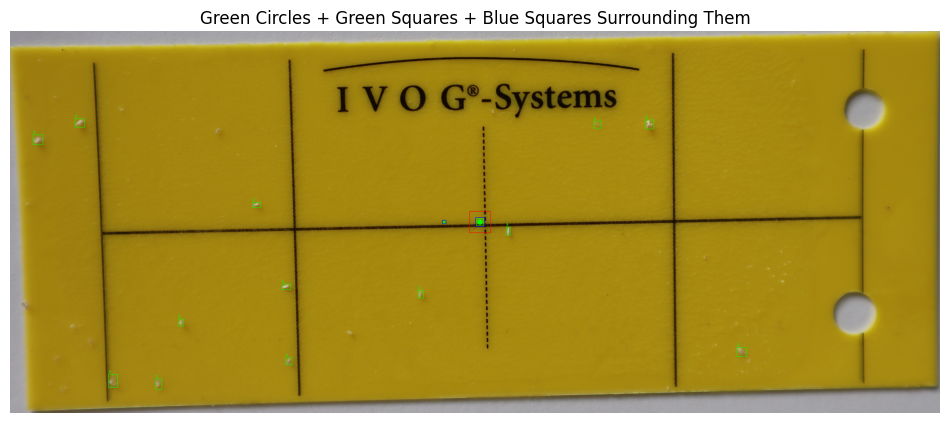

In [27]:
# --- Load background image ---
image = cv2.imread("/user/christoph.wald/u15287/big-scratch/01_dataset/images_w_bboxes/WhiteFlies/TRIAVA_0012_with_boxes.jpg")
image_height, image_width = image.shape[:2]

# --- Example areas ---
areas = [100, 1000, 513, 3249, 18360]

# --- Initialize lists ---
rectangles = []  # squares for circles
rects_scaled = []  # squares around circles (scaled 1.5)

# --- Layout parameters ---
center_y = image_height // 2
x_cursor = image_width// 2 - 200  # start with a margin

# --- Draw shapes on a copy of the image ---
img_copy = image.copy()

green_graphics_bbox = []  # to store bounding box of first two graphics

# 1. First two green circles + green squares (scaled)
for i, area in enumerate(areas[:2]):
    side = int(math.sqrt(area))
    radius = int(math.sqrt(area/np.pi))
    
    # Position: top-left corner of circle
    circle_center = (x_cursor + radius, center_y)
    
    # Draw green circle
    cv2.circle(img_copy, circle_center, radius, (0,255,0), -1)
    
    # Draw green square around circle (scaled by 1.5)
    scaled_side = int(side * 1.5)
    top_left_square = (circle_center[0] - scaled_side//2, circle_center[1] - scaled_side//2)
    bottom_right_square = (top_left_square[0] + scaled_side, top_left_square[1] + scaled_side)
    cv2.rectangle(img_copy, top_left_square, bottom_right_square, (0,255,0), 2)

    #Draw blue square around circle (5th percentile)
    side = int(math.sqrt(areas[i+2]))
    top_left_square = (circle_center[0] - side//2, circle_center[1]- side//2)
    bottom_right_square = (top_left_square[0] + side, top_left_square[1] + side)
    cv2.rectangle(img_copy, top_left_square, bottom_right_square, (255,0,0), 2)
    
    if i == 1:
        #Draw blue square around circle (5th percentile)
        side = int(math.sqrt(areas[i+3]))
        top_left_square = (circle_center[0] - side//2, circle_center[1]- side//2)
        bottom_right_square = (top_left_square[0] + side, top_left_square[1] + side)
        cv2.rectangle(img_copy, top_left_square, bottom_right_square, (0,0,255), 2)
    
    
    x_cursor += scaled_side + spacing  # move cursor for next graphic



# --- Display in Jupyter ---
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Green Circles + Green Squares + Blue Squares Surrounding Them")
plt.show()

In [28]:
file_path = "/user/christoph.wald/u15287/insect_pest_detection/image_processing_in_progress/test_generated_fat/rectangles.txt"  # replace with your file path
count = 0
def rectangles_overlap(rect1, rect2):
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    
    x1_max, y1_max = x1 + w1, y1 + h1
    x2_max, y2_max = x2 + w2, y2 + h2
    
    if x1_max <= x2 or x2_max <= x1:
        return False
    if y1_max <= y2 or y2_max <= y1:
        return False
    return True

def check_overlaps(rectangles):
    n = len(rectangles)
    for i in range(n):
        for j in range(i+1, n):
            if rectangles_overlap(rectangles[i], rectangles[j]):
                return True
    return False

# --- Read file and check line by line ---
with open(file_path, "r") as f:
    for line_num, line in enumerate(f, 1):
        line = line.strip()
        if not line:  # skip empty lines
            continue
        try:
            rectangles = eval(line)  # convert string to list
        except Exception as e:
            print(f"Error parsing line {line_num}: {e}")
            continue
        
        if check_overlaps(rectangles):
            count += 1
print(count)



53


In [50]:
import numpy as np
import ast

file_path = "/user/christoph.wald/u15287/insect_pest_detection/image_processing_in_progress/test_generated_fat/rectangles.txt"

hues = []

with open(file_path, "r") as f:
    for i, line in enumerate(f):
        if i % 2 == 0:  # skip even lines, keep every second line (1,3,5,...)
            continue
        line = line.strip()
        if not line:
            continue
        try:
            data = ast.literal_eval(line)  # parse the list
            hues.extend(data)         # add all elements to master list
        except Exception as e:
            print(f"Skipping line {i}: {e}")
            continue

# Convert to NumPy array
hues = np.array(hues)
print(hues)


[198.58024691 100.75483871 199.30666667 ... 165.78676471 159.41269841
 168.13535032]


(array([  4.,   5.,   5.,   8.,  11.,  12.,   8.,   1.,   5.,   4.,   6.,
         11.,   2.,   4.,   1.,   3.,   0.,   2.,   3.,   4.,   7.,  18.,
         26.,  48.,  90., 148., 219., 320., 317., 278., 185., 175., 104.,
         86.,  59.,  57.,  54.,  20.,   9.,   2.]),
 array([ 39.10699153,  43.48988817,  47.87278481,  52.25568145,
         56.63857809,  61.02147473,  65.40437137,  69.78726801,
         74.17016465,  78.55306129,  82.93595793,  87.31885457,
         91.70175121,  96.08464785, 100.46754449, 104.85044113,
        109.23333777, 113.61623441, 117.99913105, 122.38202769,
        126.76492433, 131.14782097, 135.53071762, 139.91361426,
        144.2965109 , 148.67940754, 153.06230418, 157.44520082,
        161.82809746, 166.2109941 , 170.59389074, 174.97678738,
        179.35968402, 183.74258066, 188.1254773 , 192.50837394,
        196.89127058, 201.27416722, 205.65706386, 210.0399605 ,
        214.42285714]),
 <BarContainer object of 40 artists>)

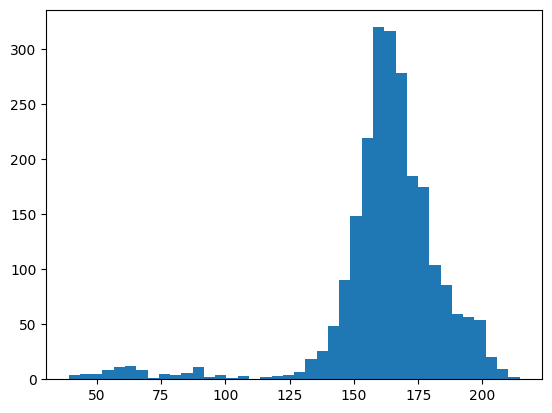

In [51]:
plt.hist(hues, bins= 40)

In [52]:
np.percentile(hues, 5)

np.float64(133.27924528301887)

In [53]:
np.percentile(hues, 1)

np.float64(58.551515151515154)

In [44]:
import cv2
from modules_segmentation import show, create_binary_mask, scale_rect, draw_bounding_boxes
import numpy as np


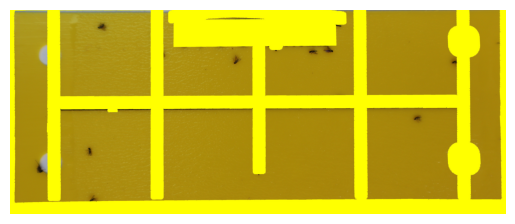

In [75]:
#image to label
image = cv2.imread("/user/christoph.wald/u15287/big-scratch/02_splitted_data/train_labeled/images_masked/TRIAVA_0010.jpg")
image = cv2.imread("/user/christoph.wald/u15287/big-scratch/02_splitted_data/train_labeled/images_masked/LIRIBO_0016.jpg")
show(image)

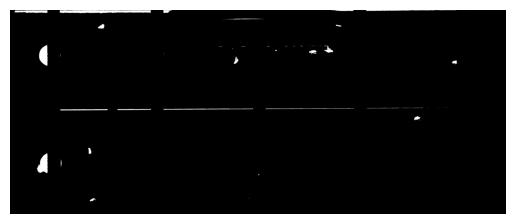

In [76]:
#only yellow thresholding
inverted_mask = cv2.bitwise_not(create_binary_mask(image))
show(inverted_mask)

In [77]:
contours, _ = cv2.findContours(inverted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"found contours in yellow segmented {len(contours)}")


found contours in yellow segmented 208


In [81]:
min_area_contour = 1000 
max_area_contour = 10000 
upper_limit_rectangles = 28626 #95th percentile
max_ratio = 1.62 #90th percentile
scale = 1.5


In [82]:
def get_list_of_rectangles(image, min_area_contour, max_area_contour, scale, max_ratio, upper_limit_rectangles):
    """
    Returns:
        rectangles : list of [x, y, w, h]
        mean_hues  : list of mean hue values corresponding to each rectangle
    """
    rectangles = []
    mean_hues = []

    #find contours in bw image
    inverted_mask = cv2.bitwise_not(create_binary_mask(image))
    contours, _ = cv2.findContours(inverted_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    for contour in contours:
        #get contour area
        contour_area = cv2.contourArea(contour)

        #filter by contour size
        if not (min_area_contour <= contour_area <= max_area_contour):
            continue

        #create and scale rectangles around contour    
        x, y, w, h = cv2.boundingRect(contour)
        x, y, w, h = scale_rect(x, y, w, h, scale)

        #exclude empty rectangles
        if w == 0 or h == 0:
            continue
        
        #filter rectangles by squareness and size
        ratio = max(w, h) / min(w, h)
        if ratio > max_ratio or w * h > upper_limit_rectangles:
            continue
        
        '''
        # create mask for this contour
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.drawContours(mask, [contour], -1, color=255, thickness=-1)
        
        # mean hue for this contour
        mean_value = cv2.mean(hsv[:, :, 2], mask=mask)[0]

        if mean_value < 133:
            continue
        '''
        
        rectangles.append([x, y, w, h])
        
        #mean_hues.append(mean_value)

    return rectangles


5 bounding boxes found.


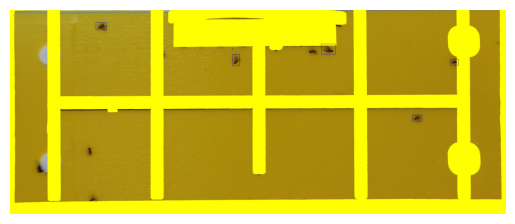

In [83]:
rectangles = get_list_of_rectangles(image, min_area_contour, max_area_contour, scale, max_ratio, upper_limit_rectangles)
show(draw_bounding_boxes(image, rectangles))